# Mark Subclip Intervals

This notebook is used to (manually) identify and document a 15-second interval in relevant videos where a humpback whale encounter is evident. 

We repeat a similar process for irrelevant videos, replacing manual interval annotation with a randomly generated 15-second interval. 

The 15-second intervals annotated here will serve as input for training our model. 

In [20]:
import pandas as pd
import numpy as np

In [69]:
#load df of successful video downloads
workspace_path = '/mount/data'
downloads_df = pd.read_csv(workspace_path + '/downloaded_videos.csv')
downloads_df.head()

,video_id,url,title,license,relevant,renamed_title,clip_start,clip_end
0,67OIlq2oMt0,https://youtu.be/67OIlq2oMt0,Hawaiian Islands Humpback Whale National Marin...,creativeCommon,True,video_0000.mp4,0:10,0:25
1,EUcMuUBMYJc,https://youtu.be/EUcMuUBMYJc,Tagging expedition: revealing the delicate nur...,creativeCommon,True,video_0001.mp4,0:44,0:59
2,dpSuygz7ZmA,https://youtu.be/dpSuygz7ZmA,Your Earth Is Blue: Disentangling a Humpback W...,creativeCommon,True,video_0002.mp4,0:05,0:20
3,jfPzlFLEuKk,https://youtu.be/jfPzlFLEuKk,"Humpback Whale || Description, Characteristics...",creativeCommon,True,video_0003.mp4,2:40,2:55
4,xGasapMoy4I,https://youtu.be/xGasapMoy4I,Your Earth Is Blue: Humpback Whales,creativeCommon,True,video_0004.mp4,0:00,0:15


# Add a Column to Store Clip Interval 
(only run this once)

In [33]:
# downloads_df['clip_start'] = [''for i in range(0, len(downloads_df))]
# downloads_df['clip_end'] = ['' for i in range(0, len(downloads_df))]

# downloads_df.head()

,video_id,url,title,license,relevant,renamed_title,clip_start,clip_end
0,67OIlq2oMt0,https://youtu.be/67OIlq2oMt0,Hawaiian Islands Humpback Whale National Marin...,creativeCommon,True,video_0000.mp4,,
1,EUcMuUBMYJc,https://youtu.be/EUcMuUBMYJc,Tagging expedition: revealing the delicate nur...,creativeCommon,True,video_0001.mp4,,
2,dpSuygz7ZmA,https://youtu.be/dpSuygz7ZmA,Your Earth Is Blue: Disentangling a Humpback W...,creativeCommon,True,video_0002.mp4,,
3,jfPzlFLEuKk,https://youtu.be/jfPzlFLEuKk,"Humpback Whale || Description, Characteristics...",creativeCommon,True,video_0003.mp4,,
4,xGasapMoy4I,https://youtu.be/xGasapMoy4I,Your Earth Is Blue: Humpback Whales,creativeCommon,True,video_0004.mp4,,


# Relevant Subclip Annotation

In [22]:
#functions to double check relevance of each new potential video
from IPython.display import YouTubeVideo, Image, display, Video, HTML

def display_video(index, video_title, url):
    # display video - need to pass in videoID (at end of url) 
    print("{}: {}".format(index, video_title))
    print(url)
    videoID = url.split('/')[3]
    display(YouTubeVideo(videoID))

def get_occurence_intervals():
    '''allows user to enter occurence interval start + end time'''

    start = input('Clip Start Time: ')
    end = input('Clip End Time:   ')

    return start, end

How many videos do you want to annotate?: 

 10


107: video_0141.mp4
https://youtu.be/slZq2kL9njk


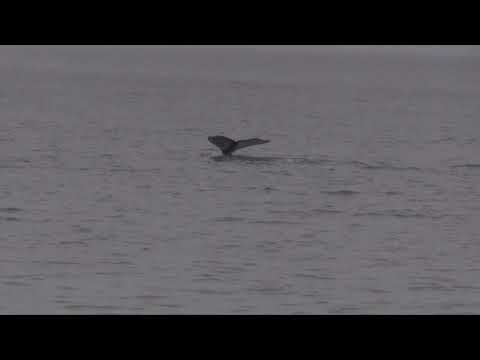

Clip Start Time:  0:00
Clip End Time:    0:15


108: video_0142.mp4
https://youtu.be/5lVC4PnHOoY


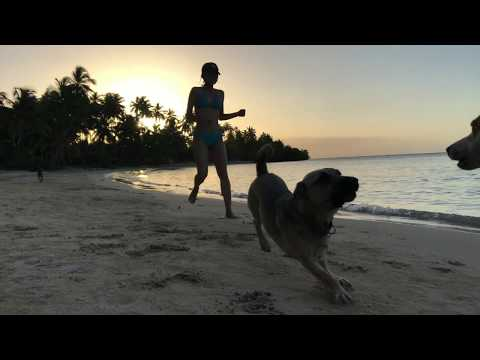

Clip Start Time:  0:28
Clip End Time:    0:34


110: video_0144.mp4
https://youtu.be/aip8zOb11E8


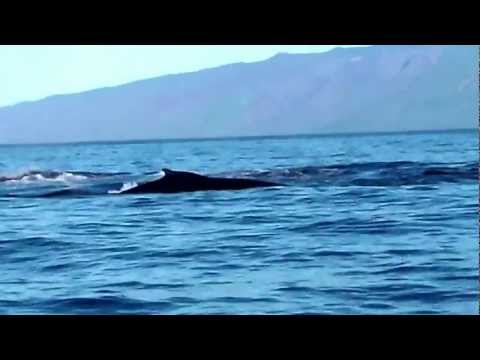

Clip Start Time:  2:00
Clip End Time:    2:15


113: video_0147.mp4
https://youtu.be/lzMeoPLPF9I


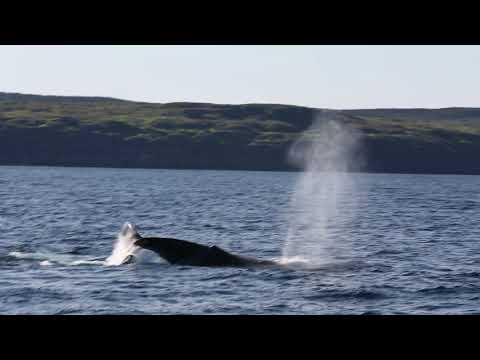

Clip Start Time:  0:04
Clip End Time:    0:19


114: video_0148.mp4
https://youtu.be/1YmZMdF5bA8


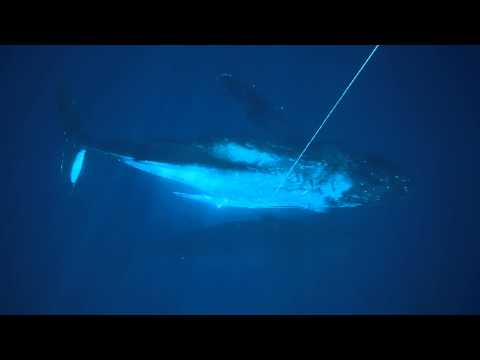

Clip Start Time:  0:00
Clip End Time:    0:15


115: video_0150.mp4
https://youtu.be/4JHqSAy6t9w


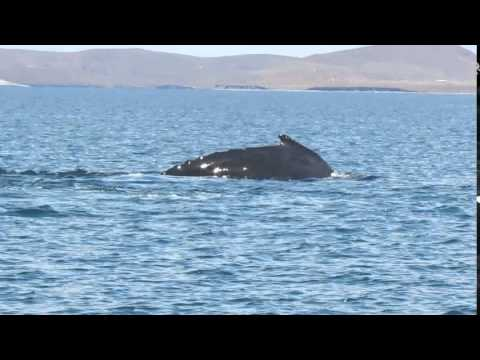

Clip Start Time:  0:00
Clip End Time:    0:12


117: video_0152.mp4
https://youtu.be/hBsFarHE1GQ


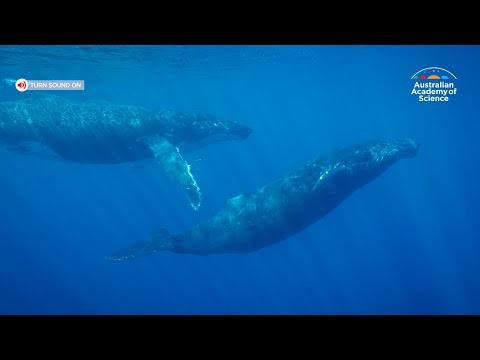

Clip Start Time:  0:00
Clip End Time:    0:15


118: video_0153.mp4
https://youtu.be/1dg3iPV-28o


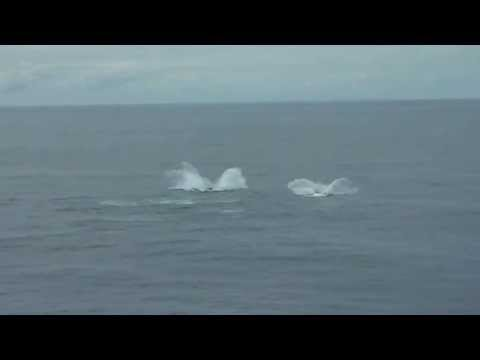

Clip Start Time:  0:00
Clip End Time:    0:15


119: video_0154.mp4
https://youtu.be/xutojQbnxfY


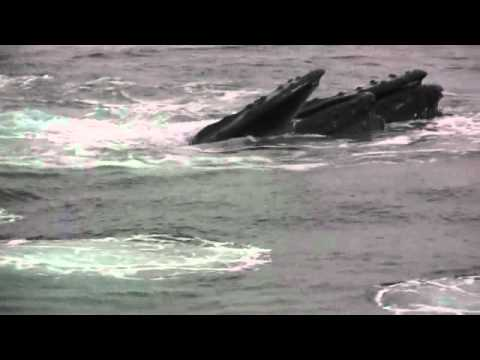

Clip Start Time:  0:05
Clip End Time:    0:20


120: video_0155.mp4
https://youtu.be/k-HnpCT2ilA


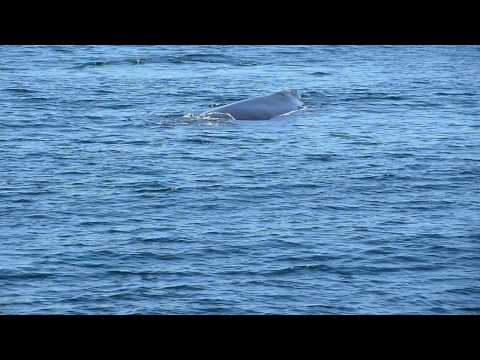

Clip Start Time:  0:50
Clip End Time:    1:05


Done annotating videos 107 to 120 



In [131]:
#loop through relevant videos and annotate whale encounter intervals
print('How many videos do you want to annotate?:', end = " ")
num_videos = int(input())

#pickup on the next relevant video w/o a clip interval
video_indices_to_annotate = list(downloads_df[(downloads_df.clip_start.isna()) & (downloads_df.relevant == True)].index)

#annotate clip intervals and record in dataset
for i in video_indices_to_annotate[:num_videos]:
    row = downloads_df.loc[i]
    display_video(i, row['renamed_title'], row['url'])
    clip_start, clip_end = get_occurence_intervals()
    downloads_df.at[i, ('clip_start')] = clip_start
    downloads_df.at[i, ('clip_end')] = clip_end   
    
print(f'Done annotating videos {video_indices_to_annotate[0]} to {video_indices_to_annotate[num_videos-1]} \n')

In [135]:
#checking updates
downloads_df[(downloads_df.clip_start.notna()) & (downloads_df.relevant == True)][-4:]

,video_id,url,title,license,relevant,renamed_title,clip_start,clip_end
117,hBsFarHE1GQ,https://youtu.be/hBsFarHE1GQ,Why whales sing,creativeCommon,True,video_0152.mp4,0:00,0:15
118,1dg3iPV-28o,https://youtu.be/1dg3iPV-28o,Humpback whales breach,creativeCommon,True,video_0153.mp4,0:00,0:15
119,xutojQbnxfY,https://youtu.be/xutojQbnxfY,Gloucester HarborWalk #36 Humpback Whale Watch...,creativeCommon,True,video_0154.mp4,0:05,0:20
120,k-HnpCT2ilA,https://youtu.be/k-HnpCT2ilA,"Humpback Whales, California",creativeCommon,True,video_0155.mp4,0:50,1:05


In [136]:
print(len(downloads_df[(downloads_df.clip_start.isna()) & (downloads_df.relevant == True)]), 'more relevant videos to annotate')

90 more relevant videos to annotate


# Save Changes

In [137]:
# update csv with annotated intervals
downloads_df.to_csv(workspace_path + '/downloaded_videos.csv', index=False)
downloads_df.to_csv('/workspace/youtube-humpback-whale-classifier/data/downloaded_videos.csv', index=False)